Dataset :https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

# Attribute Information
**Age:** age of the patient [years]

**Sex:** sex of the patient [M: Male, F: Female]

**ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

**RestingBP:** resting blood pressure [mm Hg]

**Cholesterol:** serum cholesterol [mm/dl]

**FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

**RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

**MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]

**ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]

**Oldpeak:** oldpeak = ST [Numeric value measured in depression]

**ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

**HeartDisease:** output class [1: heart disease, 0: Normal]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Exploratory data analysis

In [3]:
df.shape

(918, 12)

**Inference**
- There are 918 data entries and 12 columns, 11 of which are features and 1 being the target column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# show number of unique entries in each column
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [6]:
# data basic statistics
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
# missing values in decerding order
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Inference**
- There are no null values in the dataset, so there is no need for imputation

## Getting the numerical and categorical features

In [8]:
categorical = df.select_dtypes(include=['object'])
numerical = df.select_dtypes(include=['int64', 'float64'])

print('Categorical features:\n', categorical.columns.to_list())
print('Numerical features:\n', numerical.columns.to_list())

Categorical features:
 ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Numerical features:
 ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


# Visualization

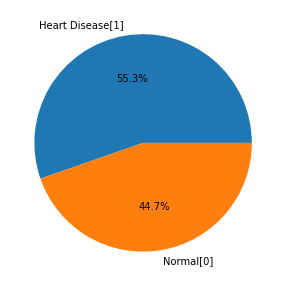

In [9]:
# Normal and Heart Disease with target column
plt.figure(figsize=(10,5))
plt.pie(df['HeartDisease'].value_counts(), labels=['Heart Disease[1]', 'Normal[0]'], autopct='%1.1f%%')
plt.show()

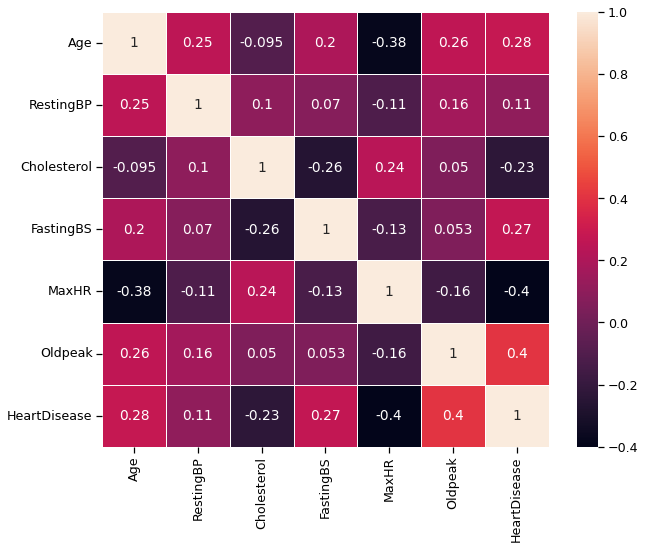

In [10]:
pd.options.display.float_format = "{:,.3f}".format
plt.figure(figsize=(10,8))
sns.set_context('notebook',font_scale = 1.15)
sns.heatmap(df.corr(),annot=True, linewidths=1)
plt.show()

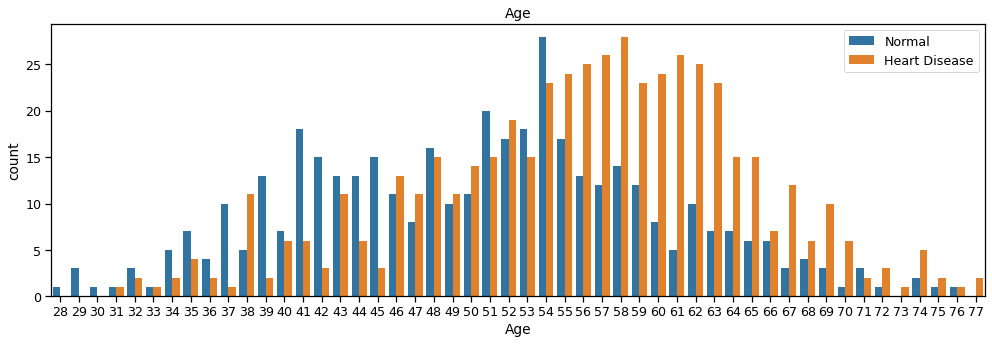

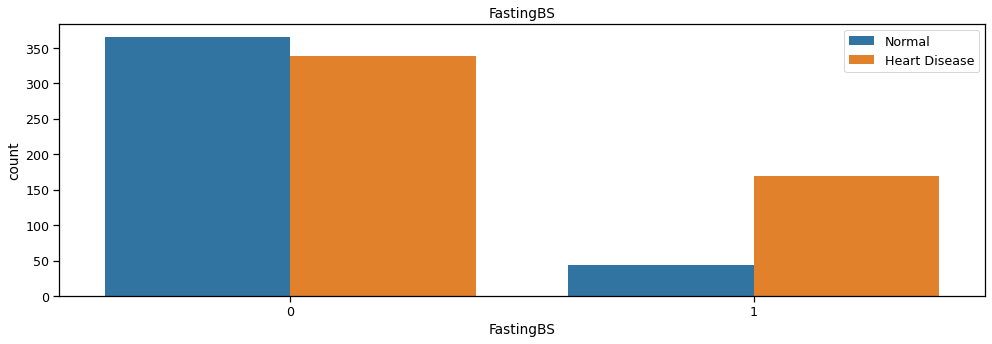

In [11]:
# ploting numerical features with target
cols_to_plot = ["Age", "FastingBS"]
for i in cols_to_plot:
    plt.figure(figsize=(14,5))
    sns.countplot(x=df[i], data=df, hue='HeartDisease')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.tight_layout()

**Inference**
-

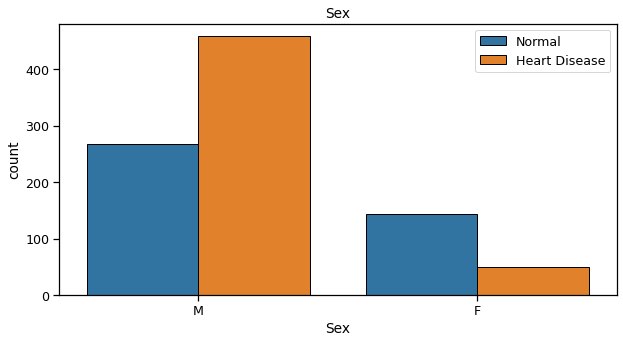

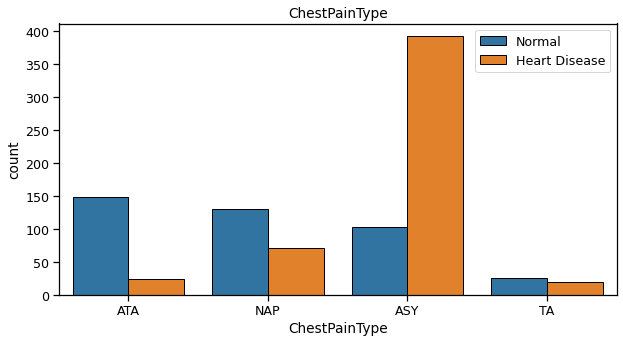

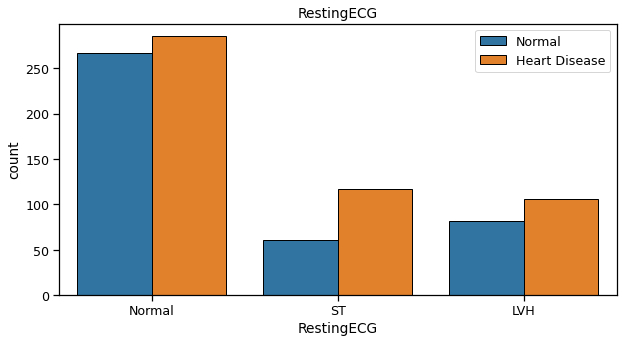

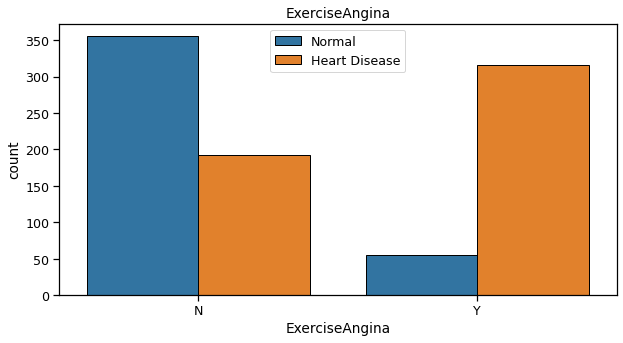

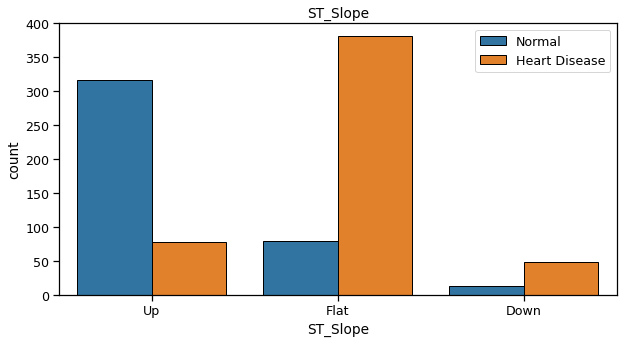

In [12]:
# ploting categorical features with target
for i in categorical:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, data=df, hue='HeartDisease', edgecolor='black')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

**Inference**
-

In [13]:
# Pairplot using target HeartDisease Column
# sns.pairplot(df, hue='HeartDisease')
# plt.show()

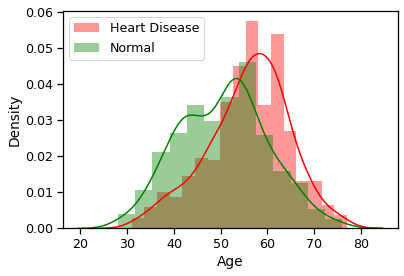

In [14]:
# distribution plot of Age for HeartDisease
sns.distplot(df['Age'][df['HeartDisease'] == 1], kde=True, color='red', label='Heart Disease')
sns.distplot(df['Age'][df['HeartDisease'] == 0], kde=True, color='green', label='Normal')
plt.legend()
plt.show()

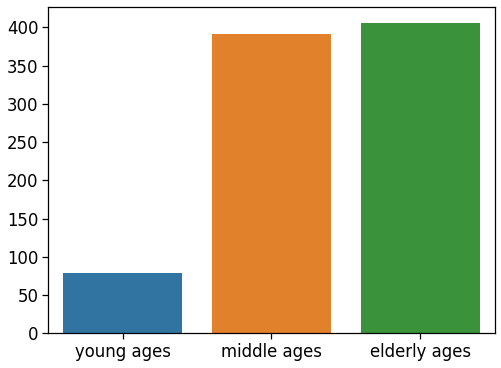

In [15]:
Young = df[(df.Age>=29)&(df.Age<40)]
Middle = df[(df.Age>=40)&(df.Age<55)]
Elder = df[(df.Age>55)]

plt.figure(figsize=(8,6))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.show()

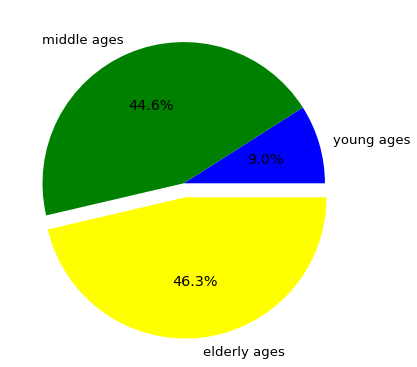

In [16]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(6,6))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

# Data Preprocessing

In [17]:
# select numerical features and encoding it
from sklearn.preprocessing import LabelEncoder

string_col = df.select_dtypes(include="object").columns

df.head()
# As we will be using both types of approches for demonstration lets do First Label Ecoding 
# which will be used with Tree Based Algorithms
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


This can be used right away in a lot of tree-based models:
    
- Decision trees
- Random forest
- Extra Trees
- Or any kind of boosted trees model
    - XGBoost
    - GBM
    - LightGBM
    
This type of encoding can't be used in linear models, support vector machines, or neural networks because they expect data to be normalized (or standardized). We can divide the data into two groups for these kinds of models. As 
shown below:

In [18]:
## Creating one hot encoded features for working with non tree based algorithms
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer


target="HeartDisease"
df_nontree = df.drop("HeartDisease",axis=1)

ohe = OneHotEncoder(handle_unknown='ignore')

transformer = make_column_transformer(
    (OneHotEncoder(), string_col),
    remainder='passthrough',
    verbose_feature_names_out=False
)

transformed = transformer.fit_transform(df_nontree)
df_nontree = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)

df_nontree.head()

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,40.000,140.000,289.000,0.000,172.000,0.000
1,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,49.000,160.000,180.000,0.000,156.000,1.000
2,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,37.000,130.000,283.000,0.000,98.000,0.000
3,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,48.000,138.000,214.000,0.000,108.000,1.500
4,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,54.000,150.000,195.000,0.000,122.000,0.000


In [19]:
# Getting the target column at the end
df_nontree=pd.concat([df_nontree,df[target]],axis=1)
df_nontree.head()

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,...,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,...,0.000,0.000,1.000,40.000,140.000,289.000,0.000,172.000,0.000,0
1,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,...,0.000,1.000,0.000,49.000,160.000,180.000,0.000,156.000,1.000,1
2,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,...,0.000,0.000,1.000,37.000,130.000,283.000,0.000,98.000,0.000,0
3,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,1.000,0.000,48.000,138.000,214.000,0.000,108.000,1.500,1
4,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,...,0.000,0.000,1.000,54.000,150.000,195.000,0.000,122.000,0.000,0


# Training

## Logistic Regression

In [20]:
feature_col_nontree=df_nontree.columns.to_list()
feature_col_nontree.remove(target)

In [21]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
acc_log=[]

kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    #print(pd.DataFrame(X_valid).head())
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    
    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass


NameError: name 'y' is not defined

## Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
acc_Gauss=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=GaussianNB()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Gauss.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc_KNN=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=KNeighborsClassifier(n_neighbors=15)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_KNN.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass


In [ ]:
acc_KNN

## Decision Tree

In [ ]:
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")


In [ ]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_col_tree,  
                                class_names=target,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph